In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt


data_path = r'C:\Users\ASUS\Downloads\archive (5)\food-101\food-101\images'
class_names_file_path = r'C:\Users\ASUS\Downloads\archive (5)\food-101\food-101\meta\classes.txt'

classes = os.listdir(os.path.join(data_path))
num_classes = len(classes)

print(f"Number of Classes: {num_classes}")
print("Classes:", classes)

Number of Classes: 102
Classes: ['.DS_Store', 'apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito', 'bruschetta', 'caesar_salad', 'cannoli', 'caprese_salad', 'carrot_cake', 'ceviche', 'cheesecake', 'cheese_plate', 'chicken_curry', 'chicken_quesadilla', 'chicken_wings', 'chocolate_cake', 'chocolate_mousse', 'churros', 'clam_chowder', 'club_sandwich', 'crab_cakes', 'creme_brulee', 'croque_madame', 'cup_cakes', 'deviled_eggs', 'donuts', 'dumplings', 'edamame', 'eggs_benedict', 'escargots', 'falafel', 'filet_mignon', 'fish_and_chips', 'foie_gras', 'french_fries', 'french_onion_soup', 'french_toast', 'fried_calamari', 'fried_rice', 'frozen_yogurt', 'garlic_bread', 'gnocchi', 'greek_salad', 'grilled_cheese_sandwich', 'grilled_salmon', 'guacamole', 'gyoza', 'hamburger', 'hot_and_sour_soup', 'hot_dog', 'huevos_rancheros', 'hummus', 'ice_cream', 'lasagna', 'lobster_bisque', 'lobster_roll_sandwich',

In [2]:
import os
data_path = r'C:\Users\ASUS\Downloads\archive (5)\food-101\food-101\images'

class_folders = os.listdir(data_path)

class_image_counts = {}

for class_folder in class_folders:
    class_path = os.path.join(data_path, class_folder)
    if os.path.isdir(class_path):
        num_images = len([f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))])
        class_image_counts[class_folder] = num_images


for class_name, num_images in class_image_counts.items():
    print(f"Class: {class_name}, Number of Images: {num_images}")

Class: apple_pie, Number of Images: 1000
Class: baby_back_ribs, Number of Images: 1000
Class: baklava, Number of Images: 1000
Class: beef_carpaccio, Number of Images: 1000
Class: beef_tartare, Number of Images: 1000
Class: beet_salad, Number of Images: 1000
Class: beignets, Number of Images: 1000
Class: bibimbap, Number of Images: 1000
Class: bread_pudding, Number of Images: 1000
Class: breakfast_burrito, Number of Images: 1000
Class: bruschetta, Number of Images: 1000
Class: caesar_salad, Number of Images: 1000
Class: cannoli, Number of Images: 1000
Class: caprese_salad, Number of Images: 1000
Class: carrot_cake, Number of Images: 1000
Class: ceviche, Number of Images: 1000
Class: cheesecake, Number of Images: 1000
Class: cheese_plate, Number of Images: 1000
Class: chicken_curry, Number of Images: 1000
Class: chicken_quesadilla, Number of Images: 1000
Class: chicken_wings, Number of Images: 1000
Class: chocolate_cake, Number of Images: 1000
Class: chocolate_mousse, Number of Images: 1

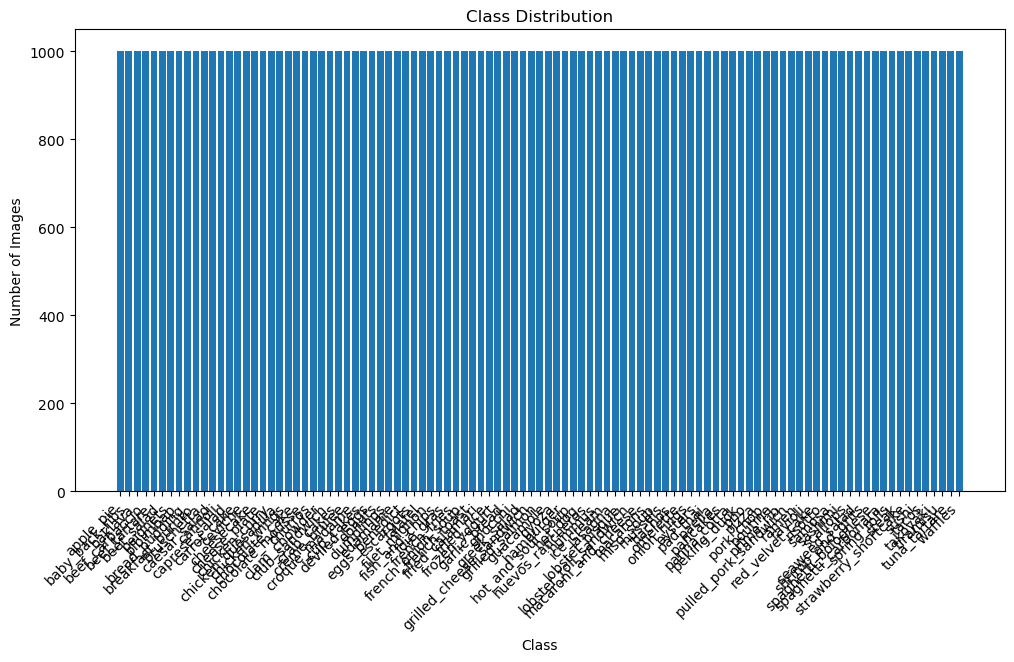

In [3]:
import matplotlib.pyplot as plt

# Plot the distribution
plt.figure(figsize=(12, 6))
plt.bar(class_image_counts.keys(), class_image_counts.values())
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Class Distribution')
plt.xticks(rotation=45, ha='right')
plt.show()


In [4]:
%%time

import os
import cv2

data_path = r'C:\Users\ASUS\Downloads\archive (5)\food-101\food-101\images'
# ouput_path = ''
dirs = os.listdir(data_path)

# Function for rescaling all images in the given directory
def rescale():
    try:
        for c in dirs:
            ch_path = os.path.join(data_path, c)
            if os.path.isdir(ch_path) and c != '.DS_Store':
                print(f'Resizing {c} images')
                for f in os.listdir(os.path.join(ch_path, "")):
                    img_path = os.path.join(ch_path, f)
                    if f.endswith('.jpg') or f.endswith('.jpeg') or f.endswith('.png'):
                        img = cv2.imread(img_path)
                        imgRescale = cv2.resize(img, (255, 255))
                        # Save the resized image to the correct folder
                        output_path_rescaled = os.path.join(ch_path,f'{os.path.splitext(f)[0]}.jpg')
                        cv2.imwrite(output_path_rescaled, imgRescale)
                        # print(output_path_rescaled)
    except Exception as error:
        print(f"An error has occurred: {error}")
#rescale()

CPU times: total: 0 ns
Wall time: 15.7 ms


In [5]:
from collections import defaultdict
from shutil import copy

# Helper method to split dataset into train and test folders
def prepare_data(filepath, src, dest):
    classes_images = defaultdict(list)
    with open(filepath, 'r') as txt:
        paths = [read.strip() for read in txt.readlines()]
        for p in paths:
            food = p.split('/')
            classes_images[food[0]].append(food[1] + '.jpg')

    for food in classes_images.keys():
        print("\nCopying images into",food)
        if not os.path.exists(os.path.join(dest,food)):
            os.makedirs(os.path.join(dest,food))
        for i in classes_images[food]:
            copy(os.path.join(src,food,i), os.path.join(dest,food,i))
    print("Copying Done!")

In [6]:
train_file_path = r'C:\Users\ASUS\Downloads\archive (5)\food-101\food-101\meta\train.txt'

%cd /
print("Creating train data...")
prepare_data(train_file_path, data_path, 'train')

C:\
Creating train data...

Copying images into apple_pie

Copying images into baby_back_ribs

Copying images into baklava

Copying images into beef_carpaccio

Copying images into beef_tartare

Copying images into beet_salad

Copying images into beignets

Copying images into bibimbap

Copying images into bread_pudding

Copying images into breakfast_burrito

Copying images into bruschetta

Copying images into caesar_salad

Copying images into cannoli

Copying images into caprese_salad

Copying images into carrot_cake

Copying images into ceviche

Copying images into cheesecake

Copying images into cheese_plate

Copying images into chicken_curry

Copying images into chicken_quesadilla

Copying images into chicken_wings

Copying images into chocolate_cake

Copying images into chocolate_mousse

Copying images into churros

Copying images into clam_chowder

Copying images into club_sandwich

Copying images into crab_cakes

Copying images into creme_brulee

Copying images into croque_madame


In [7]:
test_file_path = r'C:\Users\ASUS\Downloads\archive (5)\food-101\food-101\meta\test.txt'

print("Creating test data...")
prepare_data(test_file_path, data_path, 'test')

Creating test data...

Copying images into apple_pie

Copying images into baby_back_ribs

Copying images into baklava

Copying images into beef_carpaccio

Copying images into beef_tartare

Copying images into beet_salad

Copying images into beignets

Copying images into bibimbap

Copying images into bread_pudding

Copying images into breakfast_burrito

Copying images into bruschetta

Copying images into caesar_salad

Copying images into cannoli

Copying images into caprese_salad

Copying images into carrot_cake

Copying images into ceviche

Copying images into cheesecake

Copying images into cheese_plate

Copying images into chicken_curry

Copying images into chicken_quesadilla

Copying images into chicken_wings

Copying images into chocolate_cake

Copying images into chocolate_mousse

Copying images into churros

Copying images into clam_chowder

Copying images into club_sandwich

Copying images into crab_cakes

Copying images into creme_brulee

Copying images into croque_madame

Copy

In [8]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense
from tensorflow.keras.models import Sequential

In [9]:
batch_size = 32 
n_epochs = 50
learn_rate = 0.001

In [10]:
img_height, img_width = 255, 255
train_data_dir = 'train'
test_data_dir = 'test'
n_train_samples = 75750
n_test_samples = 25250

In [11]:
train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='sparse',  # Use 'sparse' for integer-encoded labels
    shuffle=True
)

Found 75750 images belonging to 101 classes.


In [12]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(255, 255),
    batch_size=batch_size,
    class_mode='sparse',  # Use 'sparse' for integer-encoded labels
    shuffle=False
)

Found 25250 images belonging to 101 classes.


In [13]:
num_classes = 101
# Create a sequential model
model = models.Sequential()

# Add convolutional layers with activation and pooling
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(255, 255, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten the output and add dense layers
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = learn_rate), 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 253, 253, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 126, 126, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 124, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [ ]:
history = model.fit(
    train_generator,
    epochs=n_epochs,
    verbose = 1,
    validation_data=test_generator,
)

Epoch 1/50


1396/2368 [================>.............] - ETA: 17:19 - loss: 4.6126 - accuracy: 0.0120

In [ ]:
import matplotlib.pyplot as plt

# Plot training & test accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & test loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()